# Classification : 2 Class

## 1.환경준비

### (1) 라이브러리 로딩

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense
from keras.backend import clear_session
from keras.optimizers import Adam

* 학습곡선 함수

In [2]:
def dl_history_plot(history):
    plt.figure(figsize=(10,6))
    plt.plot(history['loss'], label='train_err', marker = '.')
    plt.plot(history['val_loss'], label='val_err', marker = '.')

    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.grid()
    plt.show()

### (2) 데이터로딩

In [3]:
path = "https://raw.githubusercontent.com/DA4BAM/dataset/master/titanic.3.csv"
data = pd.read_csv(path)
data.drop(['Age_scale1', 'AgeGroup', 'SibSp','Parch' ], axis = 1, inplace = True)
data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Family
0,0,3,male,22.0,7.2500,S,2
1,1,1,female,38.0,71.2833,C,2
2,1,3,female,26.0,7.9250,S,1
3,1,1,female,35.0,53.1000,S,2
4,0,3,male,35.0,8.0500,S,1


## 2.데이터 준비

Sex, Age, Fare 만 이용하여 Survived 를 예측하는 모델을 만들어 봅시다.

### (1) 데이터 준비

In [4]:
target = 'Survived'
features = ['Sex', 'Age', 'Fare']
x = data.loc[:, features]
y = data.loc[:, target]

### (2) 가변수화

In [5]:
x = pd.get_dummies(x, columns = ['Sex'], drop_first = True)
x.head()

,Age,Fare,Sex_male
0,22.0,7.2500,1
1,38.0,71.2833,0
2,26.0,7.9250,0
3,35.0,53.1000,0
4,35.0,8.0500,1


### (3) 데이터분할

In [6]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.3, random_state = 20)

### (4) Scaling

In [7]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

## 3.딥러닝1: 3개 feature

### (1) 모델설계

In [8]:
nfeatures = x.shape[1]

In [9]:
# 메모리 정리
clear_session()

# Sequential 모델 만들기
model = Sequential( Dense( 1, input_shape  = (nfeatures ,), activation = 'sigmoid' ) )

# 모델요약
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 4         
                                                                 
Total params: 4 (16.00 Byte)
Trainable params: 4 (16.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### (2) compile + 학습

In [10]:
model.compile(optimizer=Adam(lr=0.01), loss = 'binary_crossentropy')

history = model.fit(x_train, y_train,
                    epochs = 50, validation_split=0.2).history

Epoch 1/50
16/16 [==============================] - 1s 15ms/step - loss: 0.9949 - val_loss: 1.0004
Epoch 2/50
16/16 [==============================] - 0s 4ms/step - loss: 0.9837 - val_loss: 0.9892
Epoch 3/50
16/16 [==============================] - 0s 4ms/step - loss: 0.9731 - val_loss: 0.9779
Epoch 4/50
16/16 [==============================] - 0s 4ms/step - loss: 0.9621 - val_loss: 0.9673
Epoch 5/50
16/16 [==============================] - 0s 4ms/step - loss: 0.9519 - val_loss: 0.9564
Epoch 6/50
16/16 [==============================] - 0s 4ms/step - loss: 0.9416 - val_loss: 0.9460
Epoch 7/50
16/16 [==============================] - 0s 4ms/step - loss: 0.9316 - val_loss: 0.9363
Epoch 8/50
16/16 [==============================] - 0s 4ms/step - loss: 0.9223 - val_loss: 0.9264
Epoch 9/50
16/16 [==============================] - 0s 4ms/step - loss: 0.9132 - val_loss: 0.9166
Epoch 10/50
16/16 [==============================] - 0s 3ms/step - loss: 0.9040 - val_loss: 0.9075
Epoch 11/50
16/16 

* 학습결과 그래프

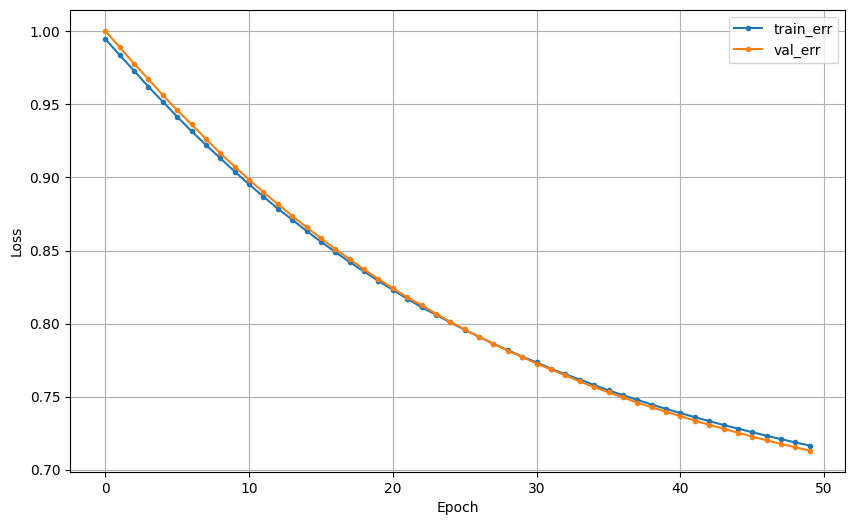

In [11]:
dl_history_plot(history)

### (3) 예측 및 검증

In [12]:
pred = model.predict(x_val)

# activation이 sigmoid --> 0 ~ 1 사이의 확률값.
# 그러므로 cut-off value(보통 0.5)를 기준으로 잘라서 0과 1로 만들어 준다.
pred = np.where(pred >= .5, 1, 0)

9/9 [==============================] - 0s 3ms/step


In [13]:
print(classification_report(y_val, pred))

              precision    recall  f1-score   support

           0       0.63      0.96      0.76       170
           1       0.25      0.02      0.04        98

    accuracy                           0.62       268
   macro avg       0.44      0.49      0.40       268
weighted avg       0.49      0.62      0.50       268



## 4.딥러닝2 : 전체 feature
* 이제 전체 데이터를 가지고 모델링을 시도해 보겠습니다.


### (1) 데이터 전처리

* 데이터 준비

In [14]:
target = 'Survived'
x = data.drop(target, axis = 1)
y = data.loc[:, target]

* 가변수화

In [15]:
cat_cols = ['Pclass','Sex', 'Embarked']
x = pd.get_dummies(x, columns = cat_cols, drop_first = True)

* 데이터분할

In [16]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.3, random_state = 20)

* 스케일링

In [17]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

### (2) 모델링

* 모델 설계

In [18]:
nfeatures = x.shape[1]

In [19]:
# 메모리 정리
clear_session()

# Sequential 모델
model = Sequential(Dense(1, input_shape = (nfeatures,), activation = 'sigmoid'))

# 모델요약
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 9 (36.00 Byte)
Trainable params: 9 (36.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* compile + 학습

In [20]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy')

history = model.fit(x_train, y_train, validation_split = 0.2, epochs = 100).history

Epoch 1/100
16/16 [==============================] - 1s 19ms/step - loss: 0.7023 - val_loss: 0.6858
Epoch 2/100
16/16 [==============================] - 0s 6ms/step - loss: 0.6985 - val_loss: 0.6815
Epoch 3/100
16/16 [==============================] - 0s 7ms/step - loss: 0.6945 - val_loss: 0.6781
Epoch 4/100
16/16 [==============================] - 0s 6ms/step - loss: 0.6914 - val_loss: 0.6748
Epoch 5/100
16/16 [==============================] - 0s 7ms/step - loss: 0.6883 - val_loss: 0.6719
Epoch 6/100
16/16 [==============================] - 0s 10ms/step - loss: 0.6855 - val_loss: 0.6691
Epoch 7/100
16/16 [==============================] - 0s 7ms/step - loss: 0.6829 - val_loss: 0.6664
Epoch 8/100
16/16 [==============================] - 0s 7ms/step - loss: 0.6802 - val_loss: 0.6638
Epoch 9/100
16/16 [==============================] - 0s 6ms/step - loss: 0.6777 - val_loss: 0.6613
Epoch 10/100
16/16 [==============================] - 0s 5ms/step - loss: 0.6754 - val_loss: 0.6588
Epoch 1

* 학습결과 그래프

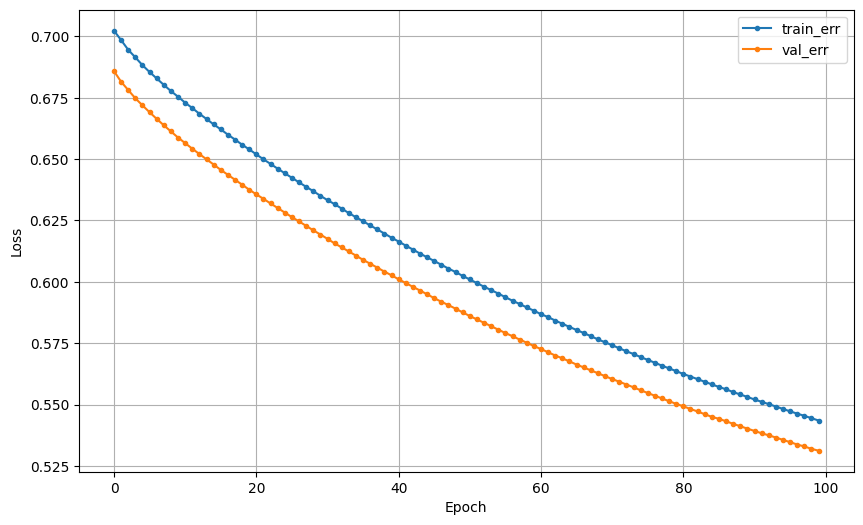

In [21]:
dl_history_plot(history)

* 예측 및 검증

In [22]:
pred2 = model.predict(x_val)
pred2 = np.where(pred2>=0.5, 1, 0)
print(classification_report(y_val, pred2))

9/9 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.76      0.91      0.83       170
           1       0.77      0.50      0.60        98

    accuracy                           0.76       268
   macro avg       0.76      0.71      0.72       268
weighted avg       0.76      0.76      0.75       268



----

## 5.딥러닝3 : hidden layer
* 이제 레이어를 추가해 보겠습니다.


### (1) 모델 설계

In [23]:
nfeatures = x_train.shape[1]


In [31]:
# 메모리 정리
clear_session()

# Sequential 모델
model = Sequential([Dense(4,input_shape= (nfeatures,), activation = 'relu'),
            Dense(1,input_shape=(4,), activation ='sigmoid')])

# 모델요약
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 36        
                                                                 
 dense_1 (Dense)             (None, 1)                 5         
                                                                 
Total params: 41 (164.00 Byte)
Trainable params: 41 (164.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### (2) compile + 학습

In [32]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy')

history = model.fit(x_train, y_train, validation_split = 0.2, epochs = 100).history

Epoch 1/100
16/16 [==============================] - 1s 12ms/step - loss: 0.7350 - val_loss: 0.7410
Epoch 2/100
16/16 [==============================] - 0s 4ms/step - loss: 0.7215 - val_loss: 0.7283
Epoch 3/100
16/16 [==============================] - 0s 4ms/step - loss: 0.7114 - val_loss: 0.7177
Epoch 4/100
16/16 [==============================] - 0s 4ms/step - loss: 0.7040 - val_loss: 0.7109
Epoch 5/100
16/16 [==============================] - 0s 4ms/step - loss: 0.6991 - val_loss: 0.7056
Epoch 6/100
16/16 [==============================] - 0s 5ms/step - loss: 0.6951 - val_loss: 0.7011
Epoch 7/100
16/16 [==============================] - 0s 4ms/step - loss: 0.6917 - val_loss: 0.6967
Epoch 8/100
16/16 [==============================] - 0s 5ms/step - loss: 0.6884 - val_loss: 0.6931
Epoch 9/100
16/16 [==============================] - 0s 5ms/step - loss: 0.6857 - val_loss: 0.6902
Epoch 10/100
16/16 [==============================] - 0s 4ms/step - loss: 0.6836 - val_loss: 0.6871
Epoch 11

* 학습결과 그래프

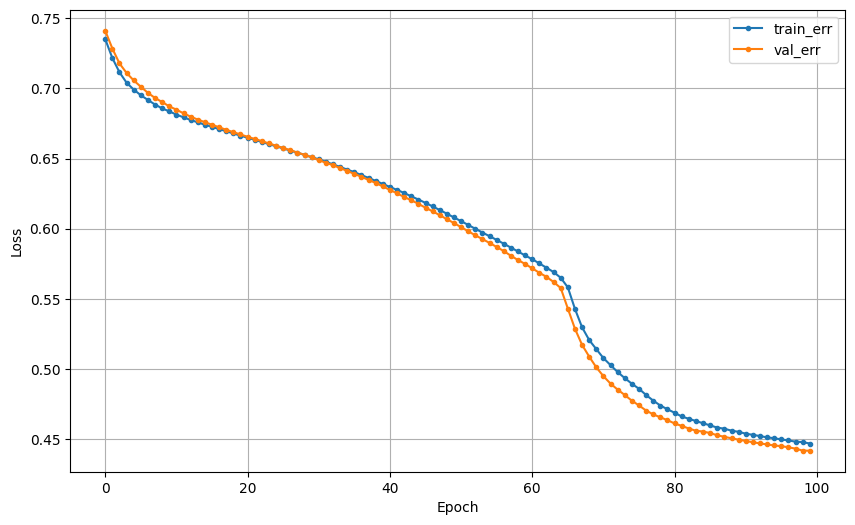

In [33]:
dl_history_plot(history)

* 예측 및 검증

In [34]:
pred3 = model.predict(x_val)
pred3 = np.where(pred3>=0.5, 1, 0)
print(classification_report(y_val,pred3))

9/9 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.75      0.89      0.82       170
           1       0.73      0.49      0.59        98

    accuracy                           0.75       268
   macro avg       0.74      0.69      0.70       268
weighted avg       0.74      0.75      0.73       268



### (3) 실습1

* 다음의 summary를 보고 모델을 설계하시오.

| Layer (type) | Output Shape | 옵션 |
| ---- | ---- | ---- |
| dense (Dense) | (None, 16)  | node, input_shape, activation = 'relu' |
| dense_1 (Dense) | (None, 1) | node, activation = 'sigmoid' |     

In [35]:
# 메모리 정리
clear_session()

# Sequential 모델
model = Sequential([Dense(16,input_shape= (nfeatures,), activation = 'relu'),
            Dense(1,input_shape=(16,), activation ='sigmoid')])

# 모델요약
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                144       
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 161 (644.00 Byte)
Trainable params: 161 (644.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [36]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy')

history = model.fit(x_train, y_train, validation_split = 0.2, epochs = 100).history

Epoch 1/100
16/16 [==============================] - 1s 13ms/step - loss: 0.6589 - val_loss: 0.6413
Epoch 2/100
16/16 [==============================] - 0s 4ms/step - loss: 0.6427 - val_loss: 0.6248
Epoch 3/100
16/16 [==============================] - 0s 4ms/step - loss: 0.6285 - val_loss: 0.6107
Epoch 4/100
16/16 [==============================] - 0s 4ms/step - loss: 0.6162 - val_loss: 0.5982
Epoch 5/100
16/16 [==============================] - 0s 5ms/step - loss: 0.6046 - val_loss: 0.5871
Epoch 6/100
16/16 [==============================] - 0s 5ms/step - loss: 0.5938 - val_loss: 0.5763
Epoch 7/100
16/16 [==============================] - 0s 5ms/step - loss: 0.5836 - val_loss: 0.5673
Epoch 8/100
16/16 [==============================] - 0s 4ms/step - loss: 0.5744 - val_loss: 0.5583
Epoch 9/100
16/16 [==============================] - 0s 4ms/step - loss: 0.5651 - val_loss: 0.5488
Epoch 10/100
16/16 [==============================] - 0s 5ms/step - loss: 0.5563 - val_loss: 0.5396
Epoch 11

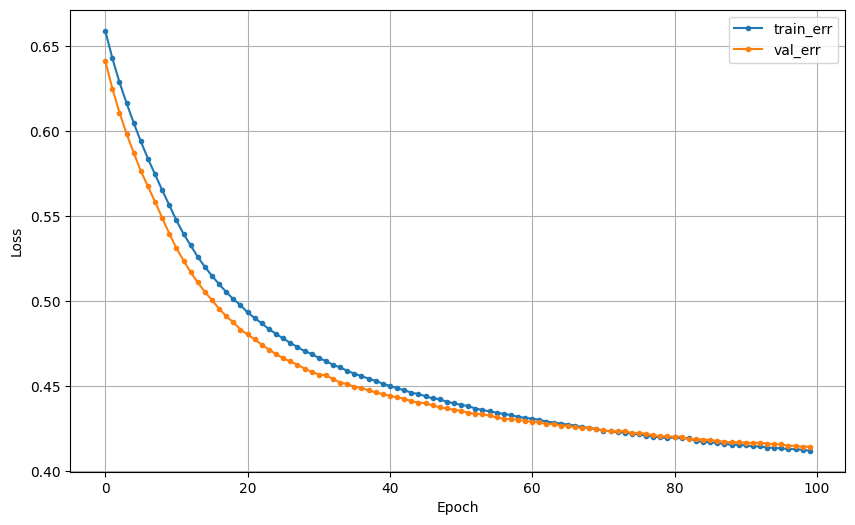

In [37]:
dl_history_plot(history)

In [38]:
pred3 = model.predict(x_val)
pred3 = np.where(pred3>=0.5, 1, 0)
print(classification_report(y_val,pred3))

9/9 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.77      0.92      0.84       170
           1       0.79      0.53      0.63        98

    accuracy                           0.78       268
   macro avg       0.78      0.72      0.74       268
weighted avg       0.78      0.78      0.76       268



### (4) 실습2

* 다음의 summary를 보고 모델을 설계하시오.

| Layer (type) | Output Shape |  옵션 |
| ---- | ---- | ---- |
| dense (Dense) | (None, 16) |  node, input_shape, activation = 'relu' |
| dense_1 (Dense) | (None, 8) |  node, activation = 'relu'  |
| dense_2 (Dense) | (None, 1) |  node, activation = 'sigmoid'  |

In [39]:
# 메모리 정리
clear_session()

# Sequential 모델
model = Sequential([Dense(16,input_shape= (nfeatures,), activation = 'relu'),
           Dense(8,input_shape= (16,), activation = 'relu'),
           Dense(1,input_shape=(8,), activation ='sigmoid')])

# 모델요약
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                144       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 289 (1.13 KB)
Trainable params: 289 (1.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [40]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy')

history = model.fit(x_train, y_train, validation_split = 0.2, epochs = 100).history

Epoch 1/100
16/16 [==============================] - 1s 13ms/step - loss: 0.6466 - val_loss: 0.6222
Epoch 2/100
16/16 [==============================] - 0s 5ms/step - loss: 0.6281 - val_loss: 0.6033
Epoch 3/100
16/16 [==============================] - 0s 5ms/step - loss: 0.6128 - val_loss: 0.5879
Epoch 4/100
16/16 [==============================] - 0s 5ms/step - loss: 0.5996 - val_loss: 0.5751
Epoch 5/100
16/16 [==============================] - 0s 5ms/step - loss: 0.5883 - val_loss: 0.5636
Epoch 6/100
16/16 [==============================] - 0s 4ms/step - loss: 0.5776 - val_loss: 0.5536
Epoch 7/100
16/16 [==============================] - 0s 5ms/step - loss: 0.5683 - val_loss: 0.5442
Epoch 8/100
16/16 [==============================] - 0s 4ms/step - loss: 0.5591 - val_loss: 0.5355
Epoch 9/100
16/16 [==============================] - 0s 5ms/step - loss: 0.5508 - val_loss: 0.5274
Epoch 10/100
16/16 [==============================] - 0s 4ms/step - loss: 0.5421 - val_loss: 0.5174
Epoch 11

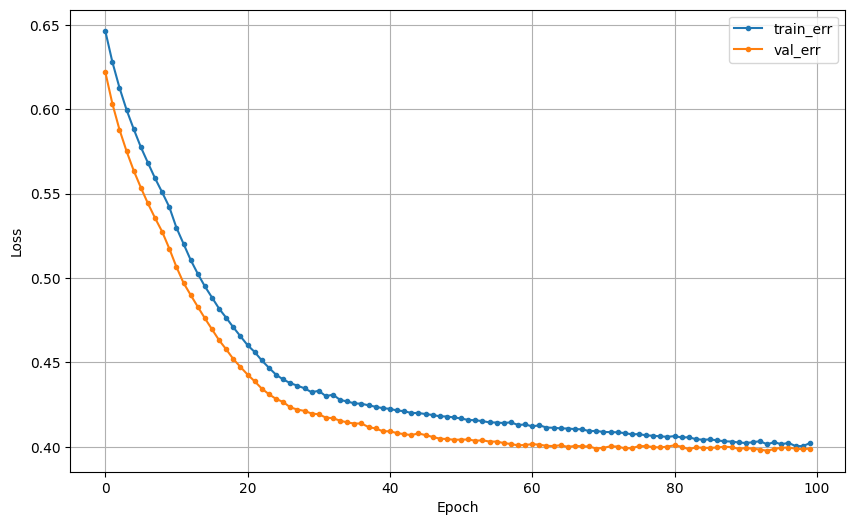

In [41]:
dl_history_plot(history)

In [42]:
pred3 = model.predict(x_val)
pred3 = np.where(pred3>=0.5, 1, 0)
print(classification_report(y_val,pred3))

9/9 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.78      0.90      0.84       170
           1       0.77      0.57      0.65        98

    accuracy                           0.78       268
   macro avg       0.78      0.74      0.75       268
weighted avg       0.78      0.78      0.77       268



### (5) 실습3

* 이번에는 여러분이 원하는 대로 설계하고, 학습해 봅시다.
